# Final Phase Project, Douglas McArthur
This notebook demonstrates the implementation of the final phase of the synoptic project, showing how the previous development of a multipartite graph solution can be used to store the data required to simulate the outputs of an opinion model. The submission is broken into 4 parts, as follows:

1. Simulation using default paramters at various time periods0
2. Demonstration of the effects of beta_update and lambda_distance on simulation outputs
3. Elbow plot and plot, k means clustdemonstration
4. Demonstration of ensemble statistics and exploration of linear regression functionality.esults.

## Code Setup
As well as importing the required code libraries, it was necessary to add a temporary environment variable to prevent a warning message relating to KMeans having a memory leak issue on Windows.

In [16]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from simulation import Simulation
from settings import Settings

## Part 1 - default behaviour
The following sections demonstrate running the simulation at time points 0, 1, 2, 3, 5, and 10. Default settings are used for each run. Note that at time 0 the network is in an initialised state with respect to opinions, and all activities are plotted. Subsequent executions plot only activities that are active within a pariticular activity period.

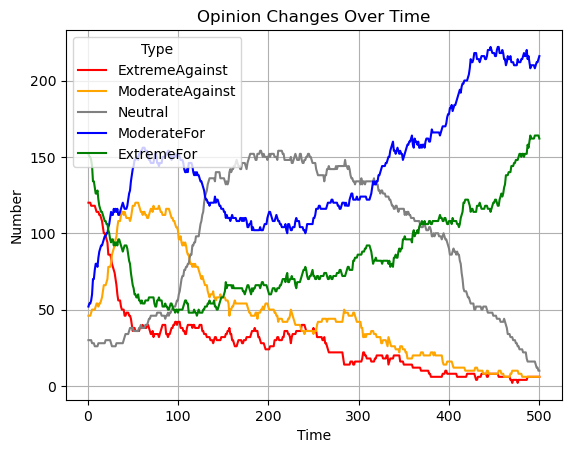

In [5]:
settings = Settings()
s = Simulation(settings)
s.run()
s.chart()

NOTE: The result of running the simulation with default settings is shown in the plot above. I had expected there to be a higher initial count of neutral invidivuals compared to positive and negative, before remembering that a neutral individual is assigned an opinion randomly between 0 and 1. The specification of the overall summary statistics was to assign opinions of the range between 0.4 and 0.6 to the neutral category, so some unbiased individuals will fall into non-neutral categories. Perhaps a better implementation would have been to standardise "neutral" and "unbiased" to mean the same thing and avoid this confusion?

In [7]:
s.plot_network(0)

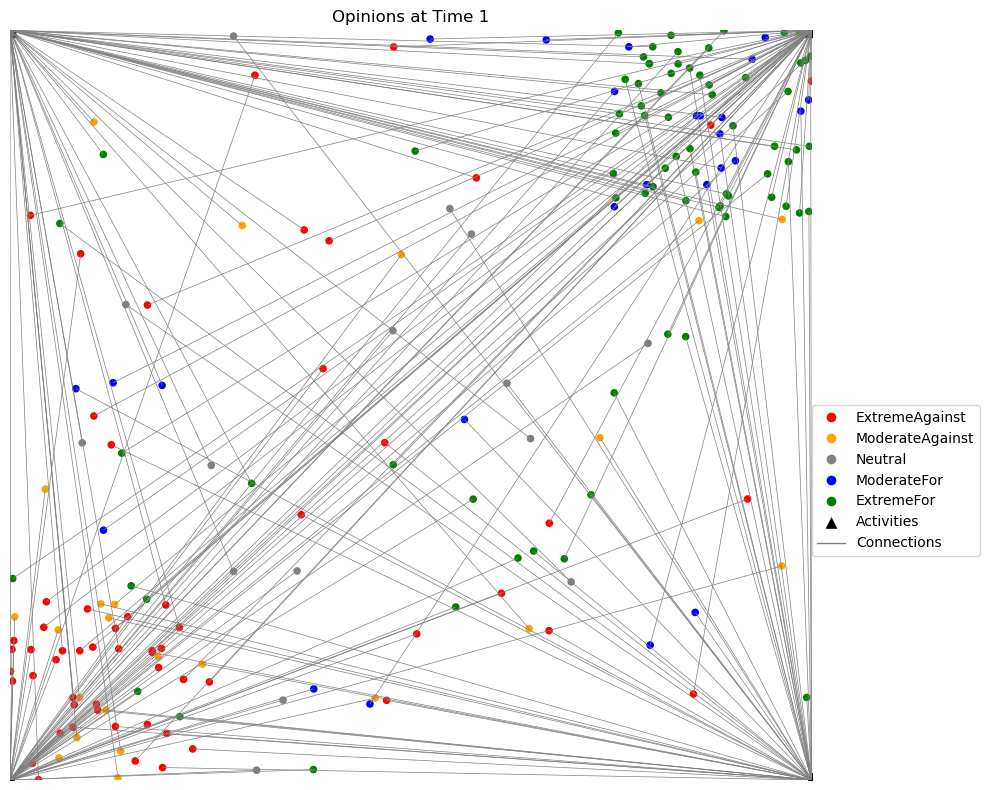

In [8]:
s.plot_network(1)

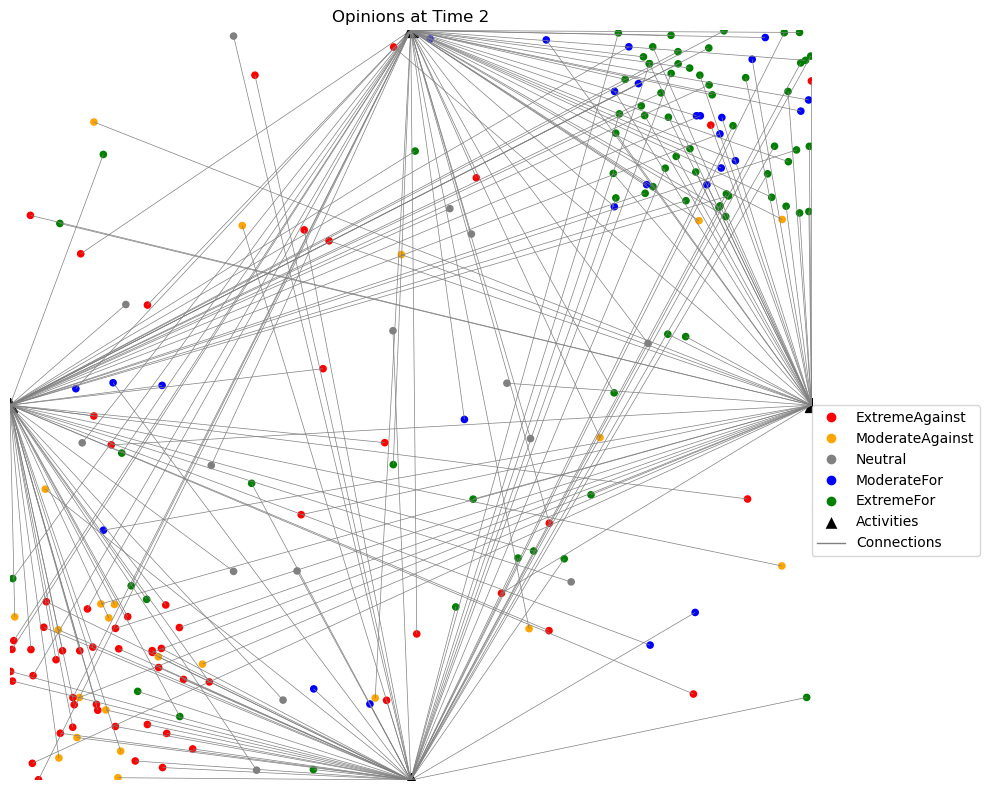

In [9]:
s.plot_network(2)

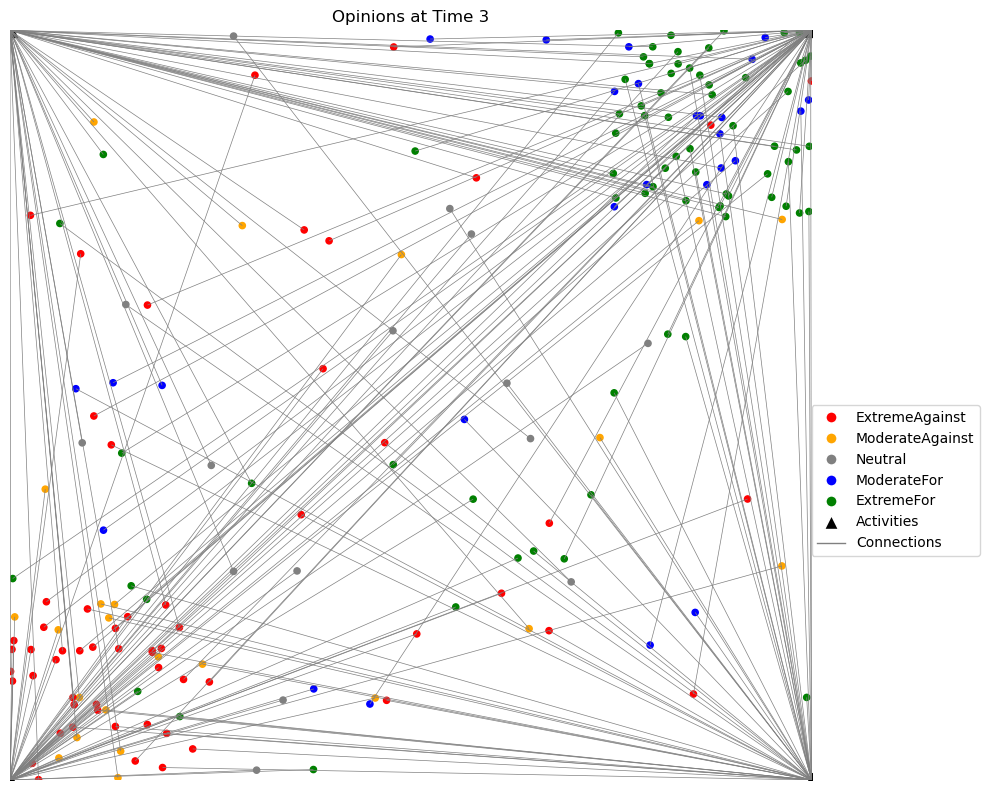

In [10]:
s.plot_network(3)

In [11]:
s.plot_network(5)

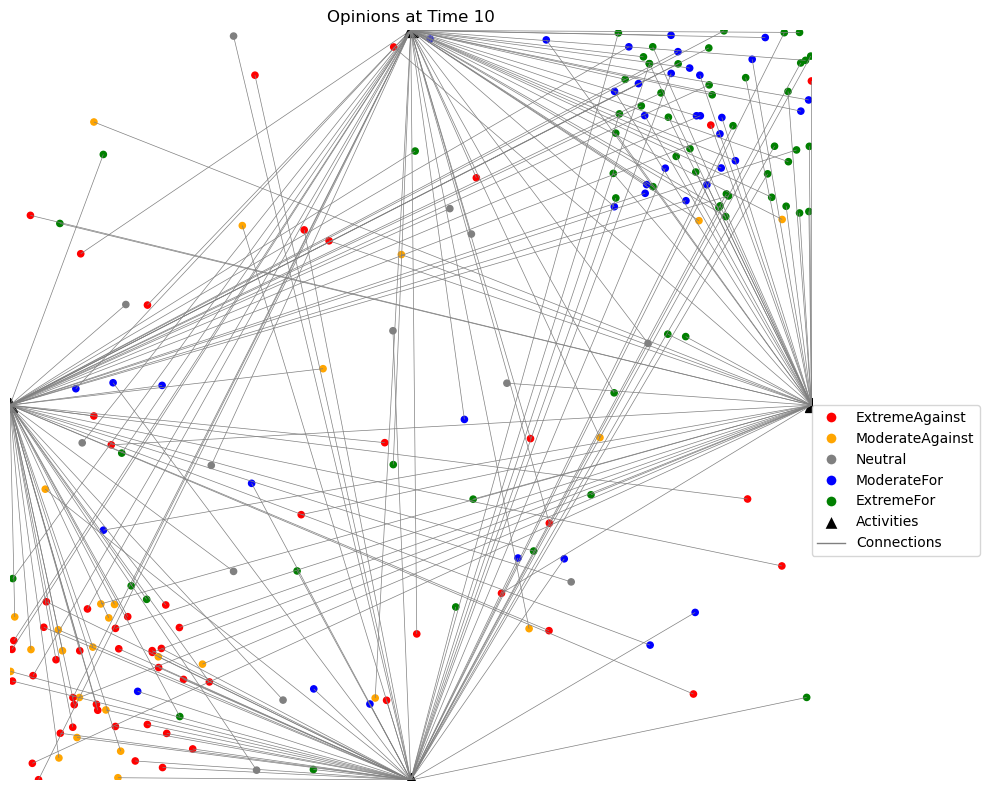

In [12]:
s.plot_network(10)

## Part 2 - parameter effects

### Beta_update=0
Running the simulation with beta_update set to zero results in both extreme for and extreme against counts slowly rising over time because only the gamma_extr factor has any bearing on opinion change. The other opinion categories remain reasonably stable, declining gradually towards zero as extreme opinions rise. This is illustrated in the plot, below. 

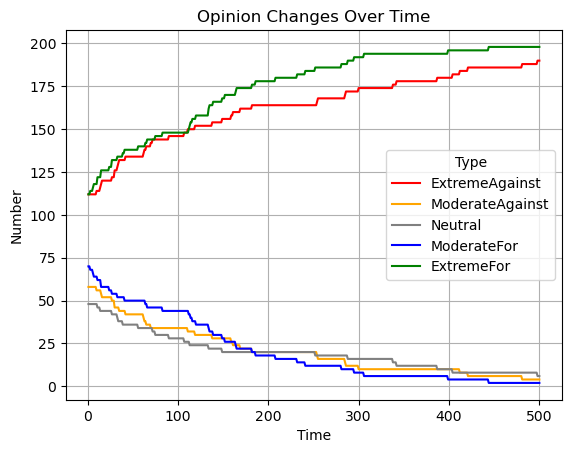

In [15]:
settings = Settings(beta_update=0)
s = Simulation(settings)
s.run()
s.chart()

### Default settings (Beta_update=0.01)

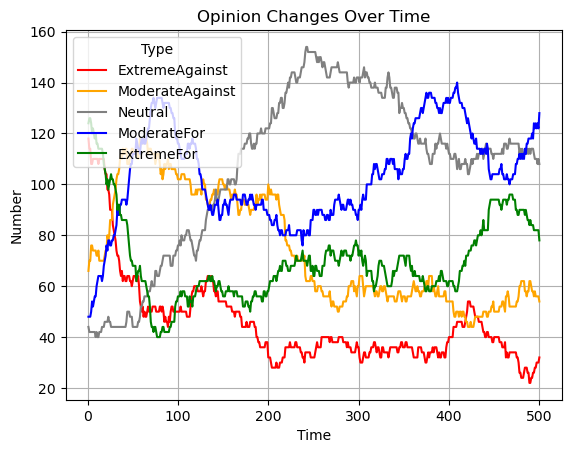

In [17]:
settings = Settings()
s = Simulation(settings)
s.run()
s.chart()

### lambda_dist=100
With lambda_dist equal to 100, the simulation produces distinct clusters of individuals at their nearest activities because individuals are more likely to be placed geographically in the closest activities. This clustering effect then results in fewer interactions between individuals who are far apart, reducing the overall diversity of opinion interactions. This is visualised in the plots, below, where extreme views gradually rise due to greater local interactions, with other opinions gradually declining. The network clearly shows the distinct clustering effect, where individuals are allocated to the closest activities.

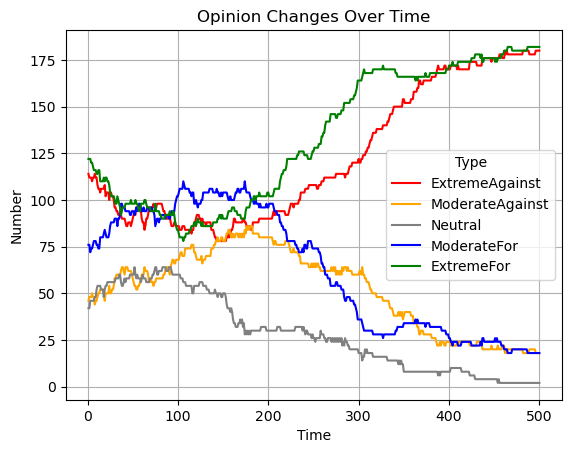

In [19]:
settings = Settings(lambda_dist=100)
s = Simulation(settings)
s.run()
s.chart()
s.plot_network(500)

## Part 3 - K means clustering

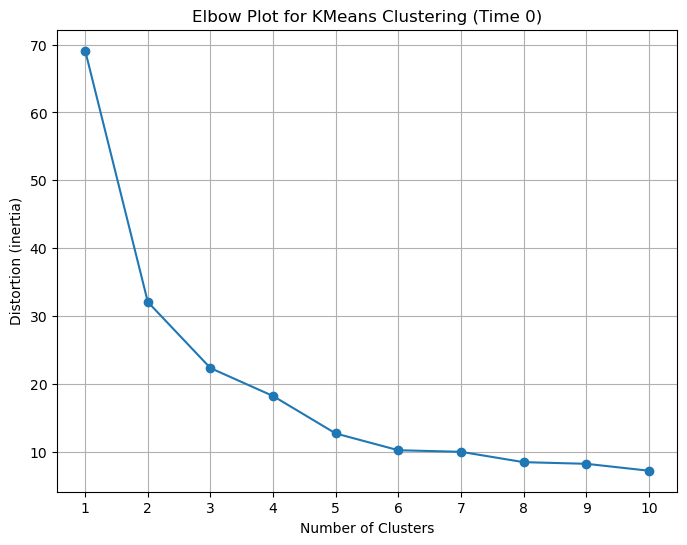

In [40]:
settings = Settings(lambda_dist=100, beta_update=0.1, beta_spread=0.01)
s = Simulation(settings)
s.run()
s.get_elbow_plot(0)

### At Time t=0: Initial Conditions
Initially there are 200 individuals randomly distributed across the simulated space. Opinions are initially distributed among three main categories based on the probabilities:

Positive (alpha_pos=0.25): 25% are predisposed toward positive opinions.
Negative (alpha_neg=0.25): 25% are predisposed toward negative opinions.
Neutral: The remaining 50% start with a neutral opinion.

At this point, clustering primarily reflects random distributions, where individuals are associated with the closest activity due to lambda_dist=1. Therefore, opinions are not yet significantly influenced by interactions, so clusters based on opinions will not be prominent. There is no clear "elbow" because the clusters are mostly spatially distributed around activities rather than influenced by opinions or interactions.

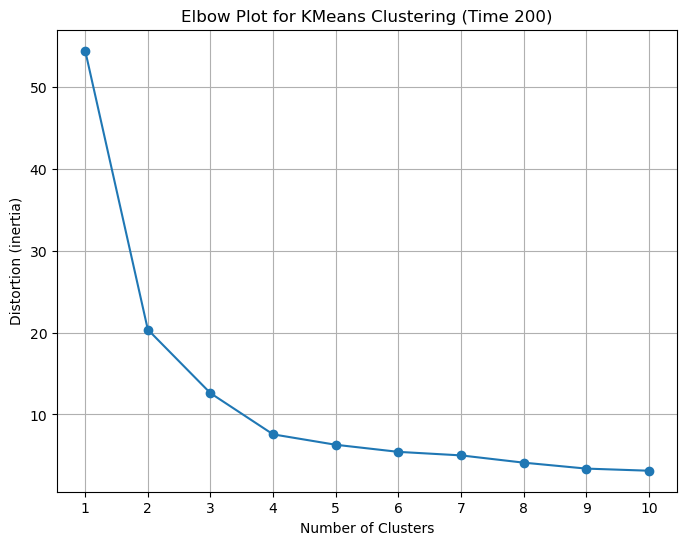

In [42]:
s.get_elbow_plot(200)

### At Time t=200: Evolved Simulation
After 200 time steps, individuals have undergone opinion updates and movement due to activity participation and interactions with others. 

Opinions have evolved based on the opinions of others as follows:

1) Gamma Factor (gamma_extr=0.005):
A small fraction of individuals (0.5%) in each time have become "completely convinced," leading to clusters of extreme opinions.

2) Beta Factors (beta_update=0.01 and beta_spread=0.01):
Opinions are influenced by interactions with neighbours and activities, gradually leading to convergence within subgroups. Neutral individuals may shift toward either extreme, and interactions with differing opinions will reduce their differences slightly.

Opinions also evolve based on spatial behaviour caused by the Lambda Factor (lambda_dist=1):
Individuals are more likely to participate in nearby activities, which reinforces spatial clustering. These clusters align with the activity locations in the g_l setting.

Clustering Behaviour:

By t=200, stronger clustering of opinions is shown, with distinct groups of individuals around extreme opinions (close to 0 or 1). Spatial clustering around activity locations persists but becomes less distinct because opinions influence movement and interactions. A clearer "elbow" emerges because the clusters are more distinct (in both opinion and location dimensions) compared to t=0. The plot suggests a choice of k=4 clusters. The effects of the simulation described above are illustrated by the kmeans plot shown below.

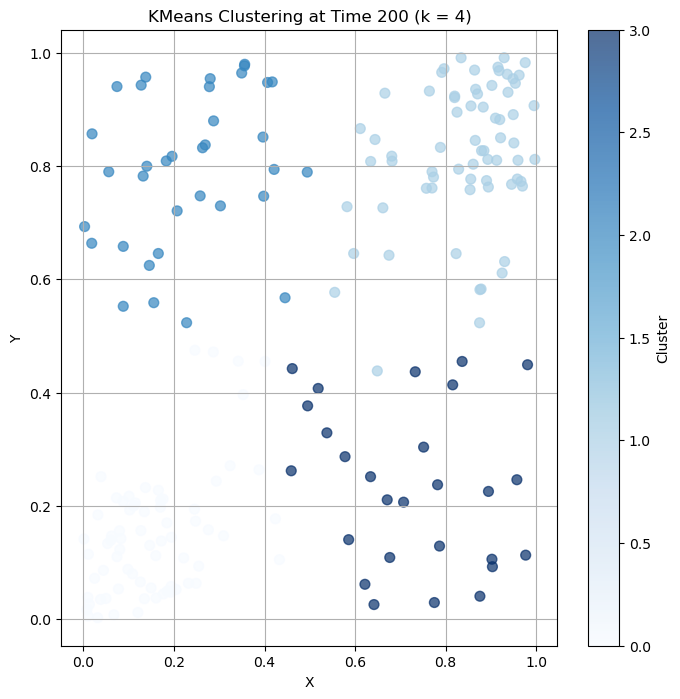

In [48]:
s.kmeans_clustering(200, 4)

## Part 4

### Ensemble Statistics
Note that running the following code with a large n value will take a considerable amount of time to complete. 

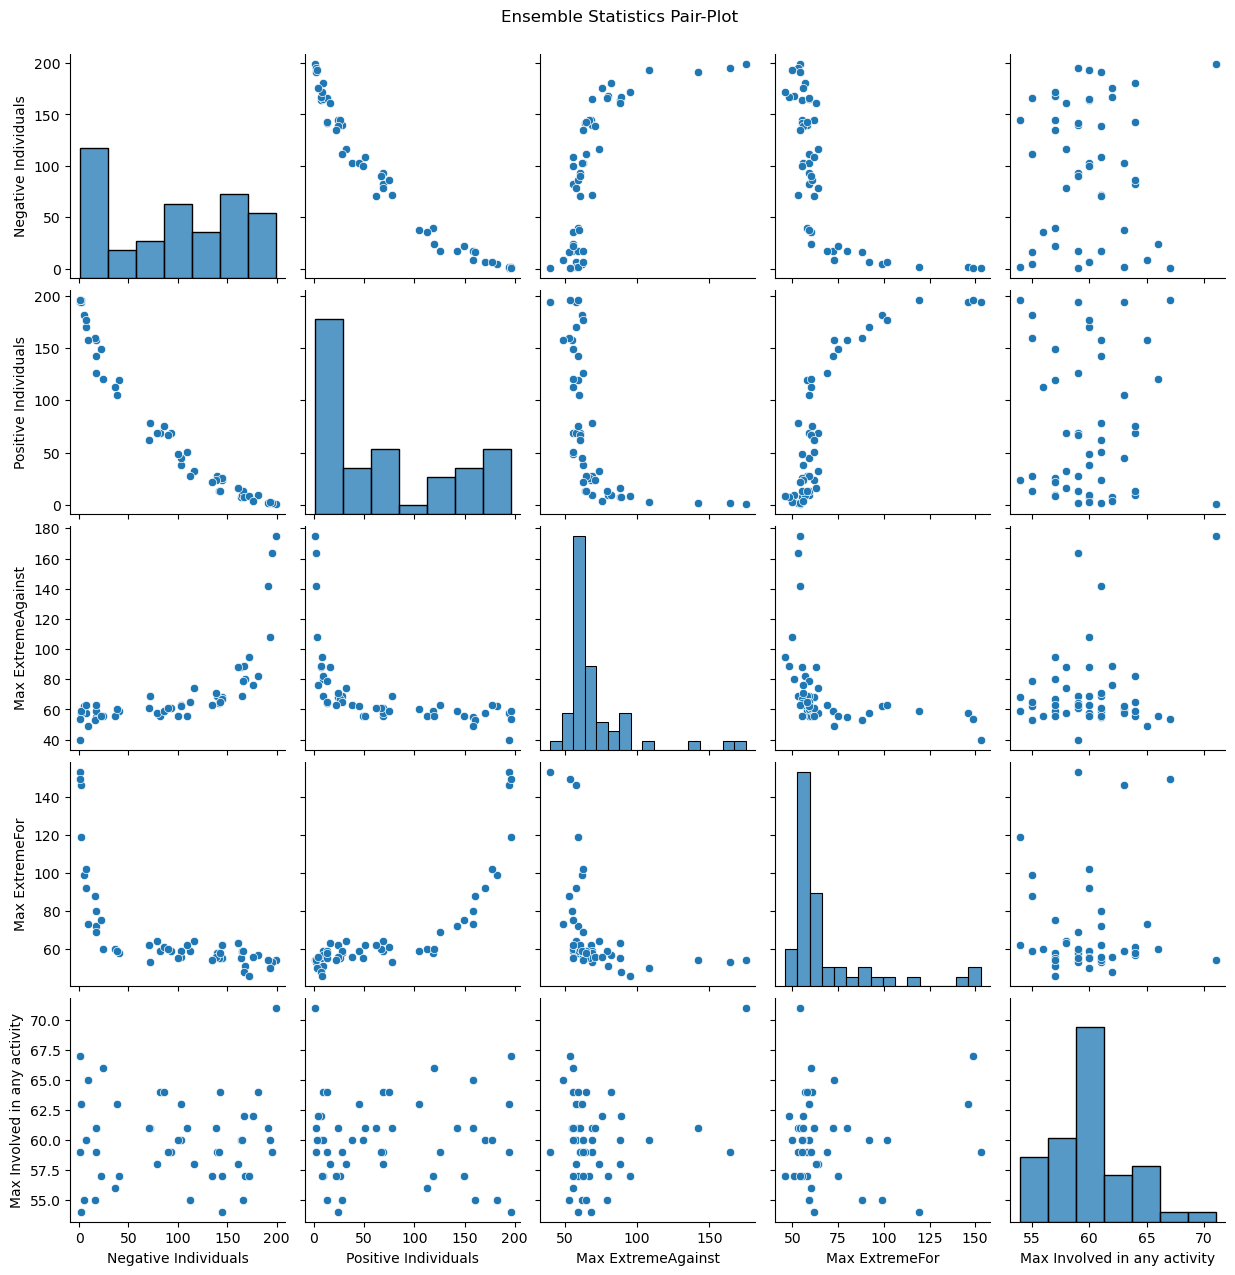

Negative Individuals  Positive Individuals  Max ExtremeAgainst  \
0                     17                   158                  55   
1                     40                   119                  59   
2                    145                    24                  68   
3                    164                     7                  88   
4                    199                     1                 175   
5                    165                     9                  69   
6                     17                   142                  59   
7                     36                   113                  56   
8                     82                    69                  56   
9                     93                    69                  61   
10                   195                     2                 164   
11                   116                    32                  74   
12                    79                    69                  58   
13                    72                    78                  69   
14                   191                     2                 142   
15                    24                   120                  56   
16                    16                   160                  53   
17                   168                     9                  80   
18                   140                    28                  69   
19                   181                     9                  82   
20                   145                    26                  67   
21                     7                   170                  58   
22                     9                   158                  49   
23                   103                    38                  63   
24                    86                    75                  59   
25                   193                     3                 108   
26                    38                   105                  60   
27                     5                   182                  62   
28                   166                    13                  79   
29                   112                    28                  65   
30                    90                    67                  61   
31                     1                   194                  40   
32                   142                    13                  64   
33                     2                   194                  58   
34                   167                     7                  89   
35                    71                    62                  61   
36                     2                   196                  59   
37                   139                    24                  71   
38                    17                   126                  63   
39                   172                     8                  95   
40                   103                    45                  62   
41                   100                    49                  56   
42                     1                   196                  54   
43                    22                   149                  56   
44                   135                    22                  63   
45                     7                   177                  63   
46                   161                    16                  88   
47                   109                    51                  56   
48                   176                     4                  76   
49                   143                    13                  65   

    Max ExtremeFor  Max Involved in any activity  
0               80                            61  
1               58                            57  
2               62                            54  
3               55                            60  
4               54                            71  
5               59                            60  
6               72                            61  
7               60       

In [27]:
settings = Settings()
Simulation.ensemble_statistics(50, settings)

### Linear Regression Exploration

Simulation setup: default settings.

In [30]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd
import numpy as np

settings = Settings()
simulation = Simulation(settings)
simulation.run()
print(simulation.activity_summary(500))

category  ExtremeAgainst  ModerateAgainst  Neutral  ModerateFor  ExtremeFor
Activity                                                                   
11640                  3               11       26           11           6
11641                  2                0        5           27          21
11642                  0                1        1           18          15
11643                  0                0        0           33          20
11644                  1                4        8           13          10
11645                  1                3       11           25          20
11646                  1                2        7           30          17
11647                  2                3        6           21          15


Function to find "best" model.

In [32]:
def find_best_model(simulation, predictors_pool):
    """
    Find the best model based on adjusted R² using exhaustive search over all predictor combinations.
    
    Args:
        simulation: Instance of the simulation class with `fit_regression_model` defined.
        predictors_pool (list): List of all potential predictors.
    
    Returns:
        Best model summary and the set of predictors used.
    """
    best_model = None
    best_adj_r2 = -np.inf
    best_predictors = None

    # Test all possible combinations of predictors
    for r in range(1, len(predictors_pool) + 1):  # Iterate over subset sizes
        for subset in combinations(predictors_pool, r):
            model = simulation.fit_regression_model(predictors=list(subset))
            adj_r2 = model.rsquared_adj  # Adjusted R²
            
            # Check if this model is "better"
            if adj_r2 > best_adj_r2:
                best_model = model
                best_adj_r2 = adj_r2
                best_predictors = subset

    return best_model, best_predictors

In [33]:
# Define the list of all potential predictors
predictors_pool = [
    "InitialOpinion",
    "DistanceToCentre",
    "NearestActivityDistance"
] 

# Find the best model
best_model, best_predictors = find_best_model(simulation, predictors_pool)

print(f"Best Adjusted R²: {best_model.rsquared_adj}")
print(f"Best Predictors: {best_predictors}")

# Compare to full model
full_model = simulation.fit_regression_model()
print(f"Full model Adjusted R²: {full_model.rsquared_adj}")

Best Adjusted R²: 0.16365881359894463
Best Predictors: ('InitialOpinion', 'DistanceToCentre')
Full model Adjusted R²: 0.3532026906934215


In [34]:
mse_0 = simulation.cross_validate_model() # Full model
mse_1 = simulation.cross_validate_model(["InitialOpinion"])
mse_2 = simulation.cross_validate_model(["InitialOpinion", "DistanceToCentre"])
mse_3 = simulation.cross_validate_model(["InitialOpinion", "DistanceToCentre", "NearestActivityDistance"])
print(f"0: {mse_0} 1: {mse_1} 2: {mse_2} 3: {mse_3}")

0: 0.024024564657732308 1: 0.035263622030178625 2: 0.0355536196029844 3: 0.035569377920797514
